In [1]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [27]:

import gc
def loadSST(fn0,sis):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
#        try:
         D=np.array(f[s]['values'])
#         print(s,D.shape)
         D2.append(D[sis,:])
#        except:
#            continue;
    D2=np.array(D2)
    return D2
def loadSST2(fn0,sis,f1=0,f2=512):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
#        try:
         D=np.array(f[s]['values'])
#         print(s,D.shape)
         D2.append(D[sis,f1:f2])
#        except:
#            continue;
    D2=np.array(D2)
    return D2


In [23]:
dhours=[]
dcnt=[]
#opath='xst_mean'
fpath='sst'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files),files[0])

30 SST_2022-07-01-12-19-30.h5


In [85]:
#sis=[i for i in range(8*3,10*3)] #rcu 8 and 9
sis=[24,25,27,28] #inputs set to 110-190 bands
nsi=len(sis)

D=loadSST('sst/'+files[0],sis)
print(D.shape)


(3600, 4, 512)


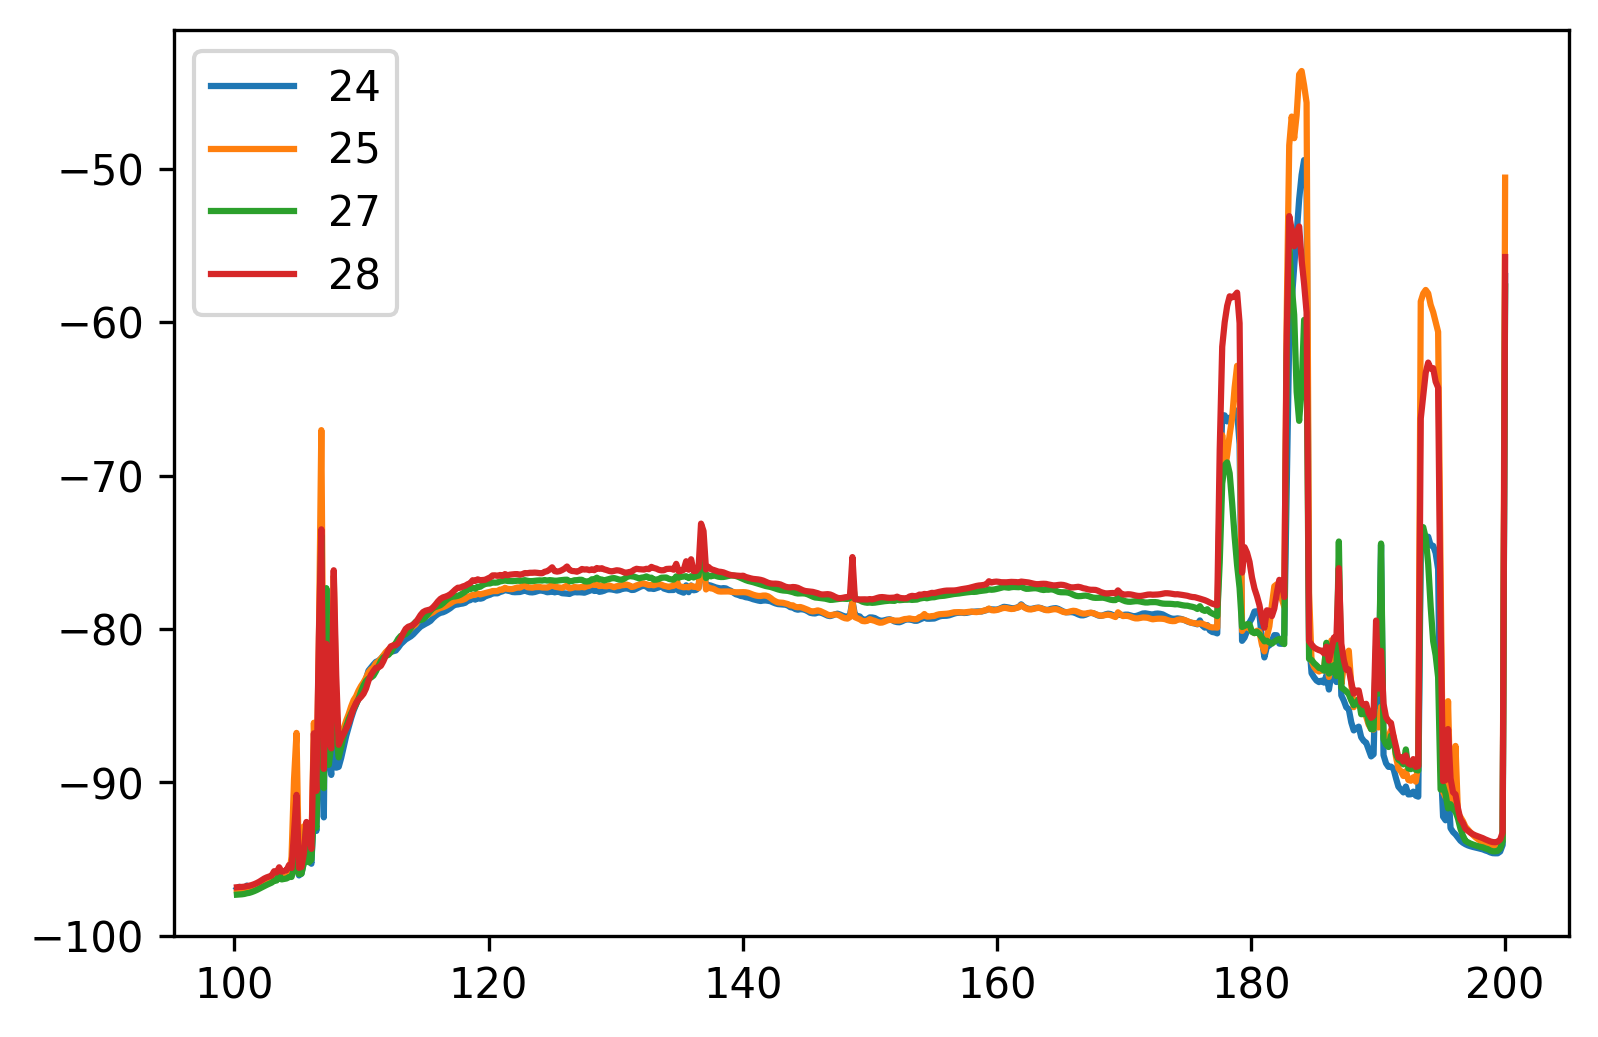

In [86]:
plt.figure(dpi=300)
Dm=np.percentile(D,50,axis=0)
freq=200-np.arange(512)/512*100
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
for i,si in enumerate(sis):
    plt.plot(freq,10*np.log10(Dm[i])-GainADC,label=str(si))
plt.legend()

In [63]:
f1=137
f2=138
if1=np.argmin(np.abs(freq-f2))
if2=np.argmin(np.abs(freq-f1))
print("selected frequency band",freq[if1],freq[if2], ' number bands=',if2-if1+1)

selected frequency band 138.0859375 136.9140625  number bands= 7


In [95]:
D2=[]
for f in files[8:9]:
    print(f)
    D=loadSST2('sst/'+f,sis,if1,if2+1)
    n1,n2,n3=D.shape
#    print(D.shape)
#    D=np.percentile( D.reshape([n1//10,10,n2,n3]),50,axis=1) #minute 'averages'
#    print(D.shape)
    D2.append(D)

SST_2022-07-01-20-19-30.h5


In [96]:
D2=np.array(D2)
nD2=D2.shape;
D2=D2.reshape([nD2[0]*nD2[1],nD2[2],nD2[3]])

Text(0.5, 1.0, 'DTS-outside SST 137.9MHz band')

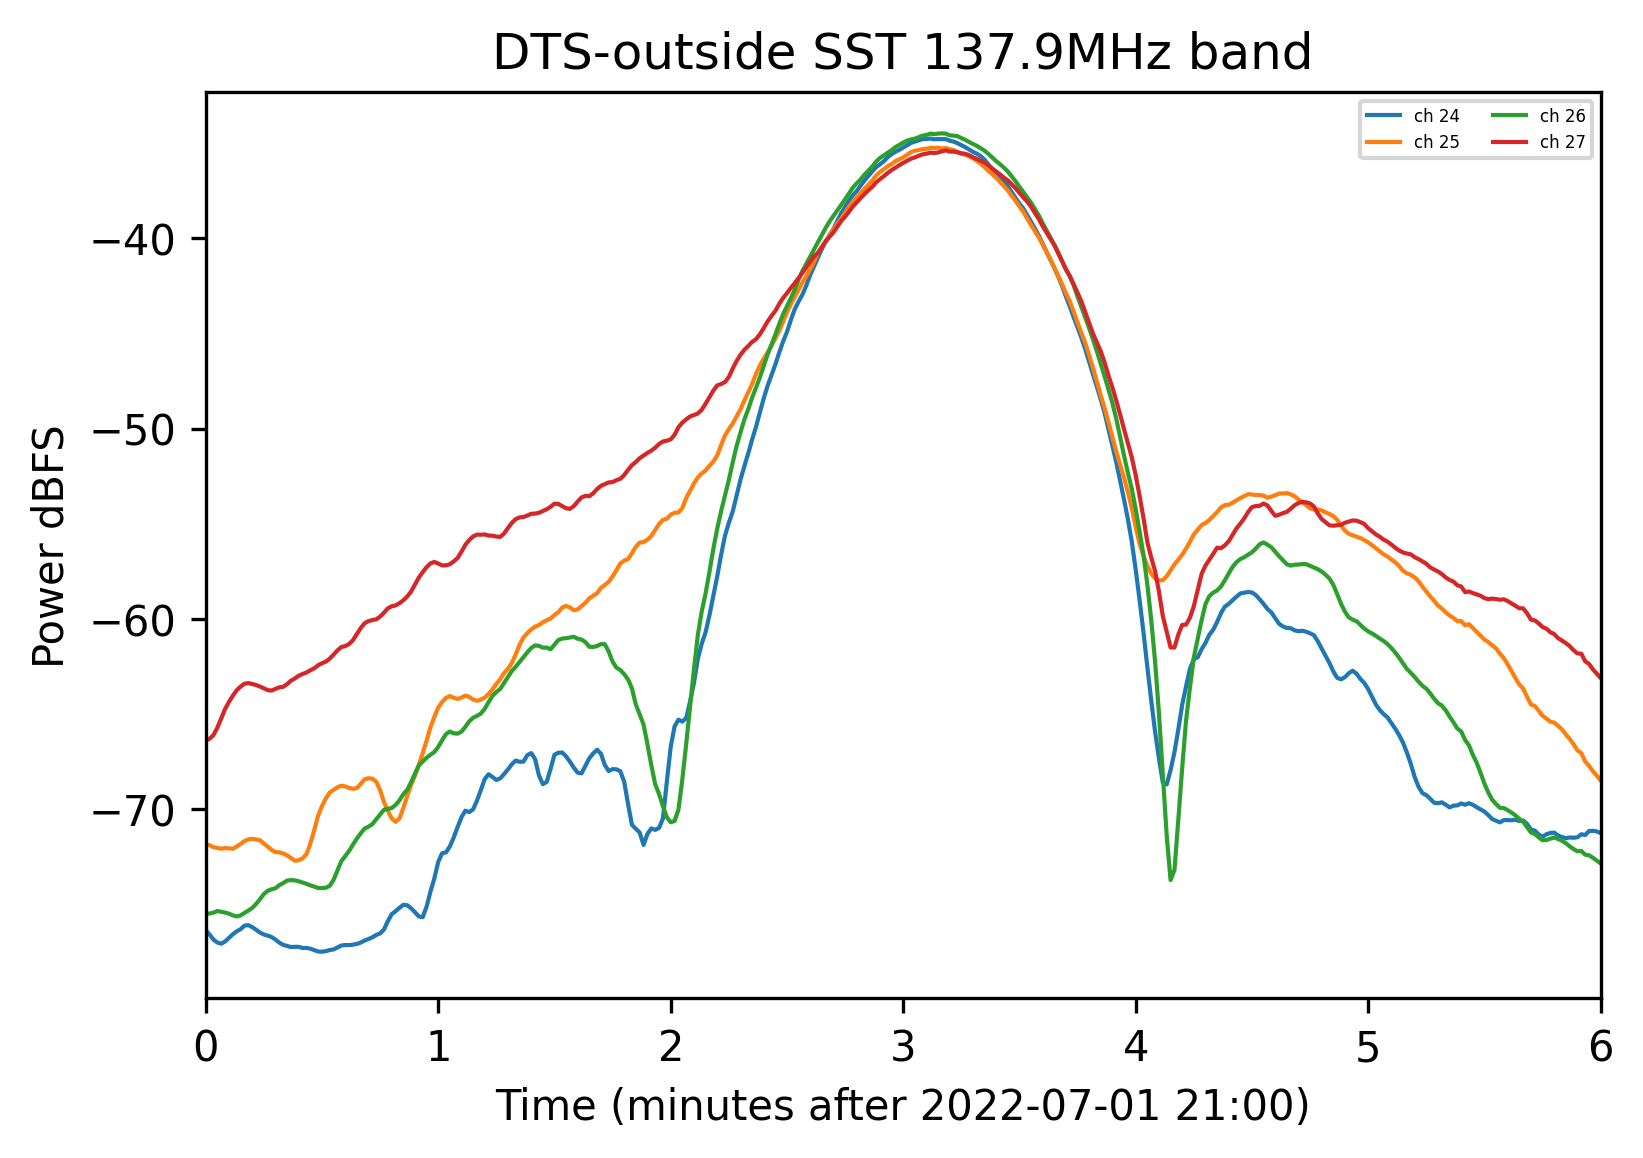

In [107]:
plt.figure(dpi=300)
time=np.arange(D2.shape[0])/60+19.5

for ch in range(4):
#    plt.gca().set_prop_cycle(None)
#    for i in range(if2-if1):
#        plt.plot(time,10*np.log10(D2[:,ch,i])-GainADC,linewidth=1,label=('%.1f MHz' % freq[if1+i] if ch==0 else ''))
    for i in [1]:
        plt.plot(time-60,10*np.log10(D2[:,ch,i])-GainADC,linewidth=1,label='ch %i'%(ch+8*3))
#plt.ylim(70,80)

plt.legend(fontsize=4,ncol=2)
plt.xlabel("Time (minutes after 2022-07-01 21:00)")
plt.ylabel("Power dBFS")
plt.xlim(0,6)
plt.title("DTS-outside SST 137.9MHz band")